# Random Forests Example

Train Accuracy: 0.9150
Test Accuracy: 0.8600


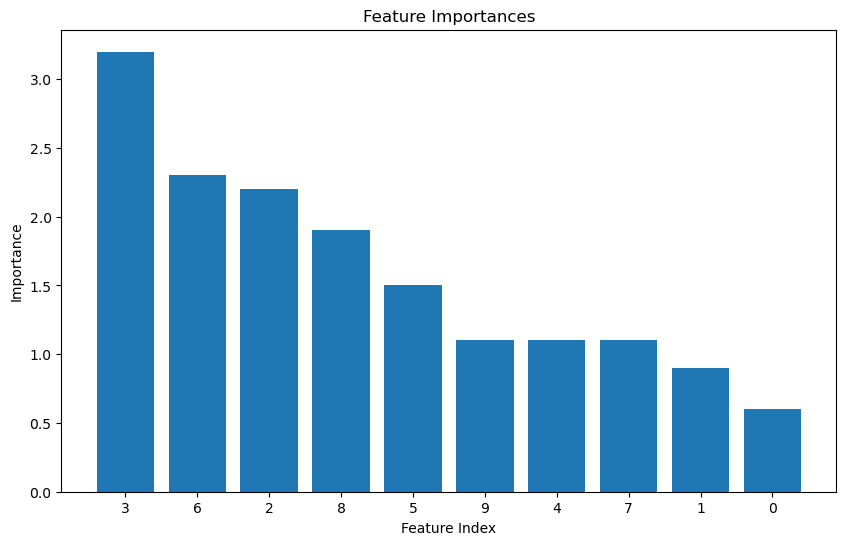

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from random_forests import RandomForest

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
                           random_state=1, n_clusters_per_class=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForest(n_trees=10, max_depth=5)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate scores
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot feature importance
def plot_feature_importance(X, y, model):
    importances = np.zeros(X.shape[1])
    for tree in model.trees:
        importances += compute_feature_importance(tree.root, X.shape[1])
    importances /= model.n_trees
    
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), indices)
    plt.xlabel("Feature Index")
    plt.ylabel("Importance")
    plt.show()

def compute_feature_importance(node, n_features, importance=None):
    if importance is None:
        importance = np.zeros(n_features)
    
    if node.feature is not None:
        importance[node.feature] += 1
        if node.left:
            compute_feature_importance(node.left, n_features, importance)
        if node.right:
            compute_feature_importance(node.right, n_features, importance)
    
    return importance

plot_feature_importance(X, y, model)